In [1]:
from __future__ import division, print_function

from IPython.core.display import HTML, Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Plotting with Pandas

## Agenda
- Line plots
- Bar plots
- Scatter plots
- Histograms
- MPL object model

In [4]:
PATH = './assets/images/'

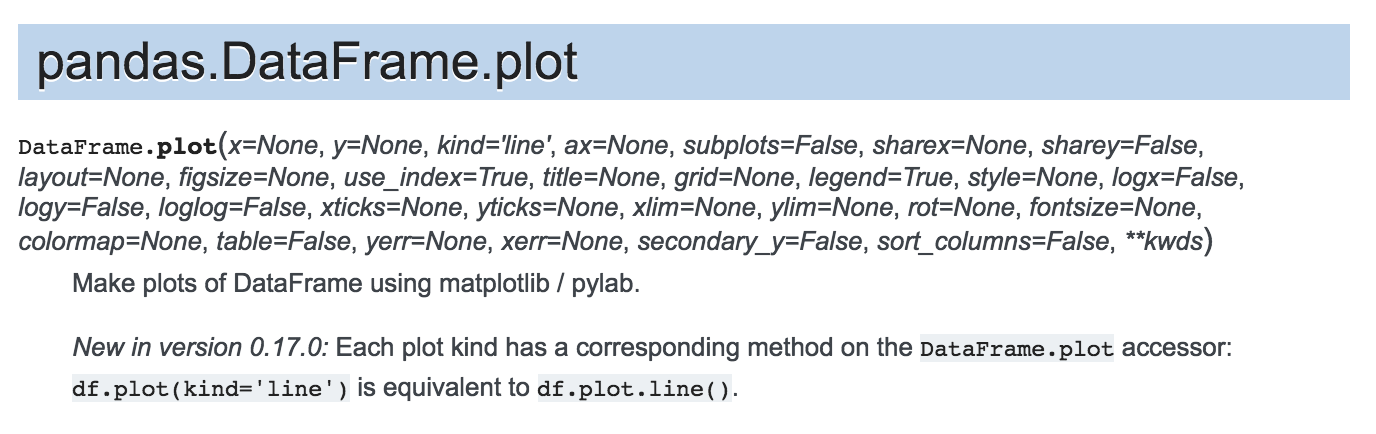

In [3]:
Image(PATH + 'pandas_plot.png')

## Import our data

In [4]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [5]:
df

,col1,col2,col3,col4
a,1.618811,-0.211125,-1.231335,1.266045
b,0.143201,0.270732,-0.122853,-0.662125
c,-0.633450,-1.259343,1.421215,0.354429
d,0.262133,0.292958,0.630328,-2.420465
e,-1.393670,-1.990335,-0.331055,-0.291327
f,0.072183,-0.541221,-0.829429,-1.617010
g,1.563295,-0.775631,-0.197282,0.115922
h,-1.010111,-0.072458,0.990186,1.041648
i,-1.500952,-1.187204,1.207956,-0.001514
j,-1.352388,0.009523,-0.283803,-1.896834


## Line plot - DataFrame

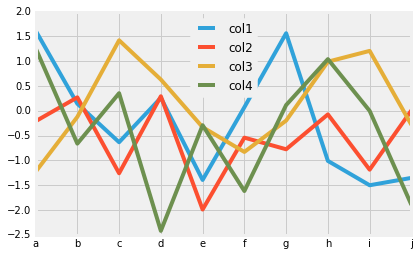

In [6]:
df.plot()

### <ul> Line plots are the default plot in pandas

## Line plot - Series

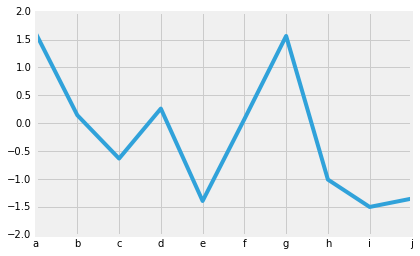

In [7]:
df['col1'].plot()

## We can pass in parameters to change the dimensions and the size

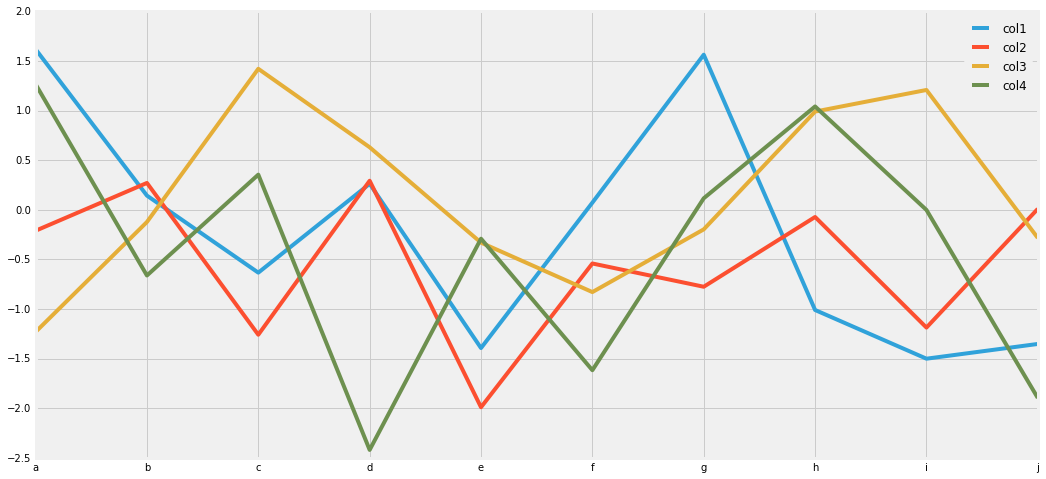

In [8]:
df.plot(figsize=(16,8))

### <ul>figsize(width, height)

## We can change the color

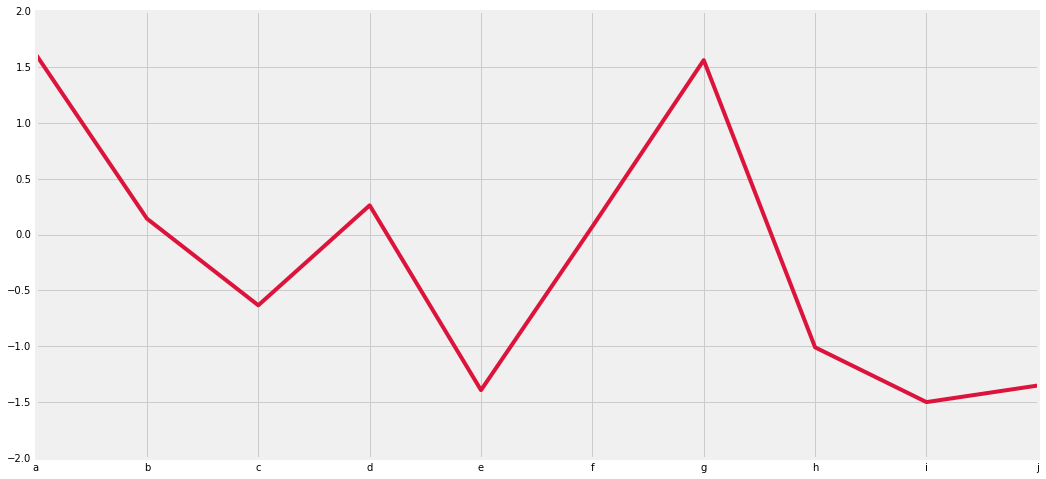

In [9]:
df['col1'].plot(color='crimson', figsize=(16,8))

## We can change the style - markers

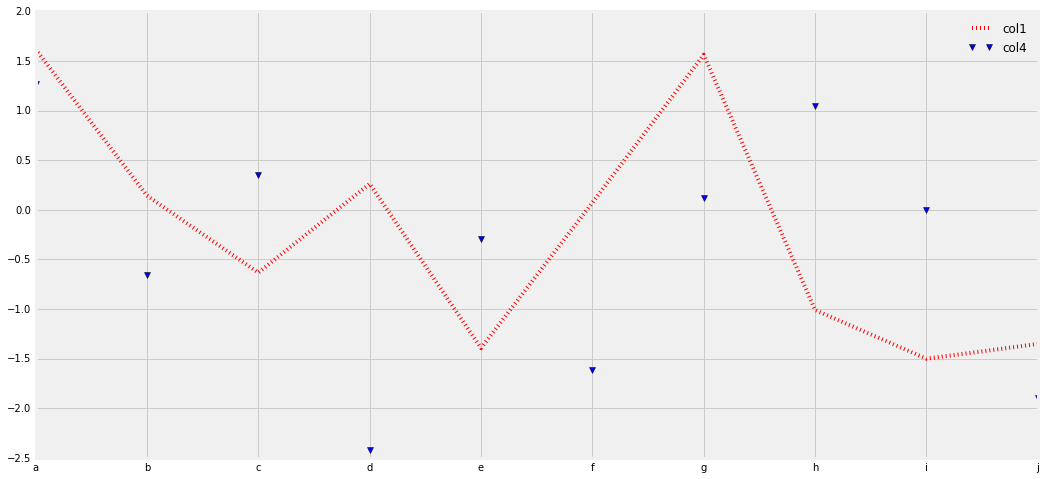

In [453]:
df[['col1', 'col4']].plot(figsize=(16,8),\
                          style={'col1': ':r', 'col4': 'vb'})

## E1. Using the df, create a line plot of col2 and col3. For col2 use a green o and for col3 use a blue dashed line. Set the width to 12 and the height to 8.

## We can change the visible ticks and their size

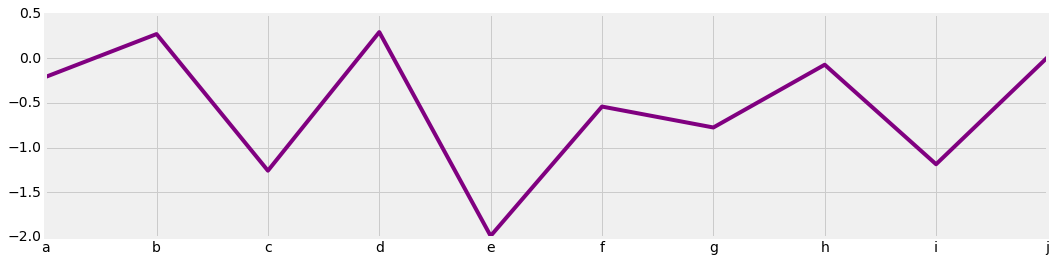

In [50]:
df['col2'].plot(figsize=(16,4), color='purple', fontsize=14)

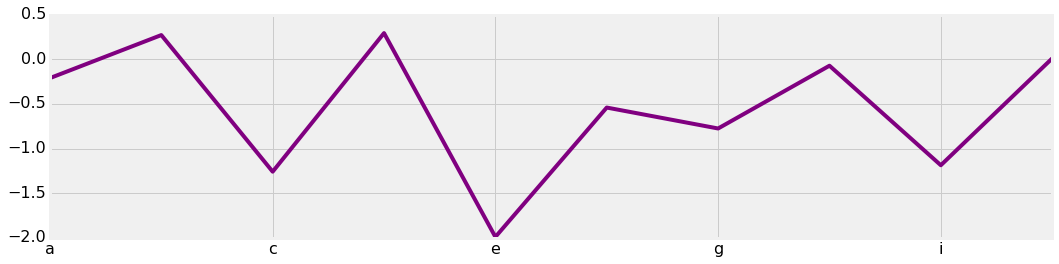

In [51]:
ticks_to_show = [x for x in range(len(df['col2'].index)) if x%2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16)

## We can change the label rotation

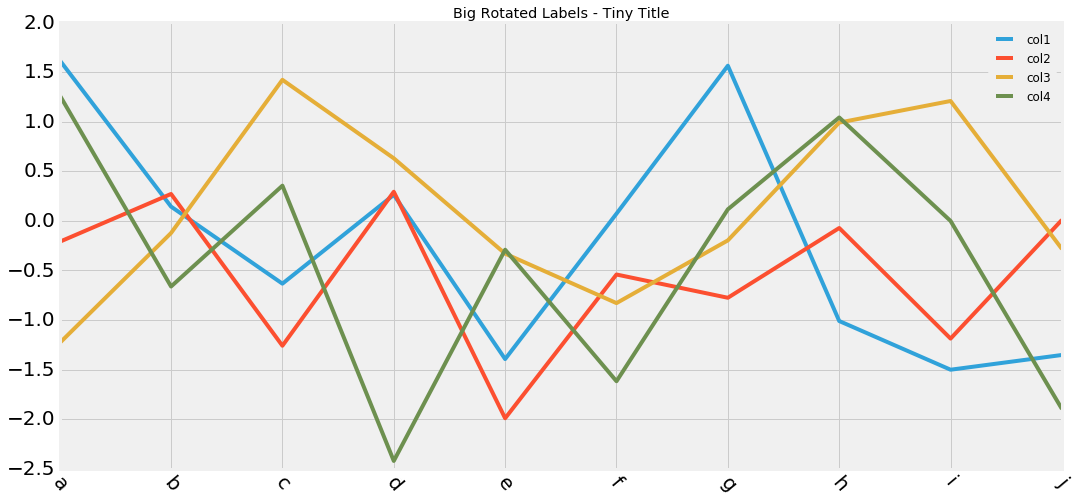

In [52]:
df.plot(figsize=(16,8), fontsize=20, rot=-50, title='Big Rotated Labels - Tiny Title')

### E2. Create a line chart with col4. Rotate the labels 90 degrees and give them a fontsize of 16. Set the color to dark orange. Set they title to "My Cool Plot". Set the figure size to 14 by 7.

## All the functionality of Matplotlib is available

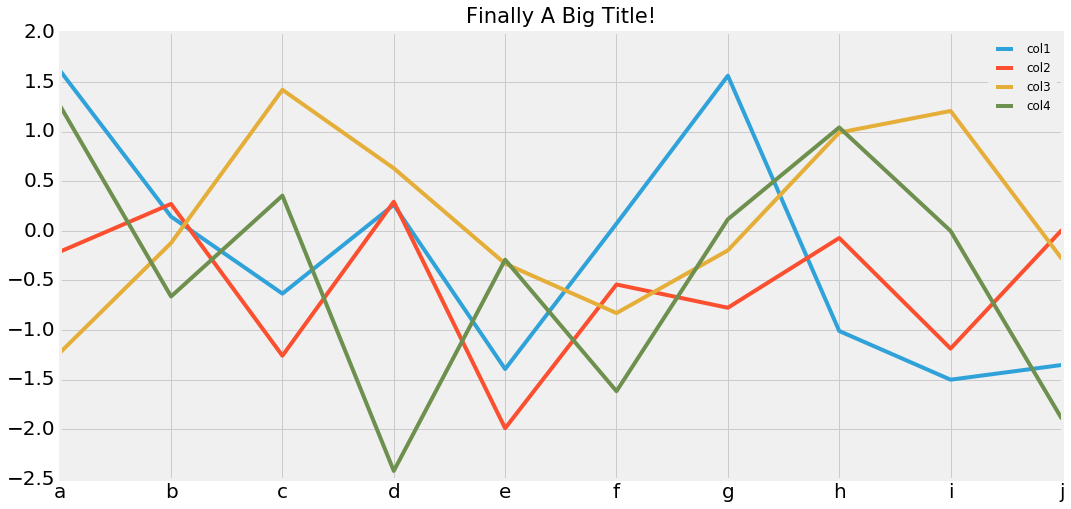

In [68]:
fig = df.plot(figsize=(16,8), fontsize=20)
ax = plt.gca()

ax.set_title('Finally A Big Title!', fontsize=21, y=1.01)

#### E3. Create a plot using the full data frame. Set the figure size to 16 by 8. Give it any title you want with a fontsize of 22. Move the title so that it is in the the body of the graph. Set a y label  of "this is my y axis" and an x label equal to "this is my x axis". Give both labels a fontsize of 16. Rotate your x axis label - what you just created - 180 degrees.

# Bar Plots

## Series

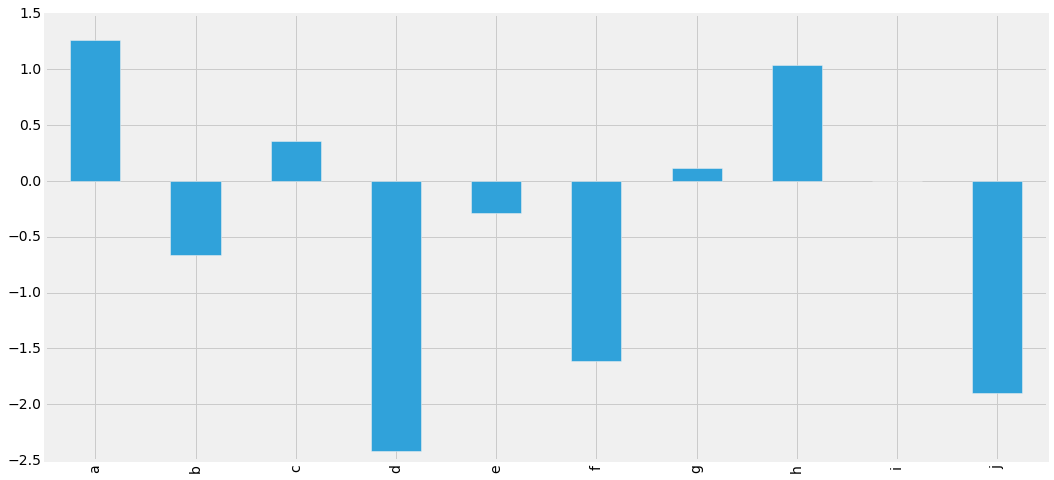

In [88]:
df['col4'].plot(kind='bar', figsize=(16,8), fontsize=14) 

## Using matplotlib commands we can get fancy

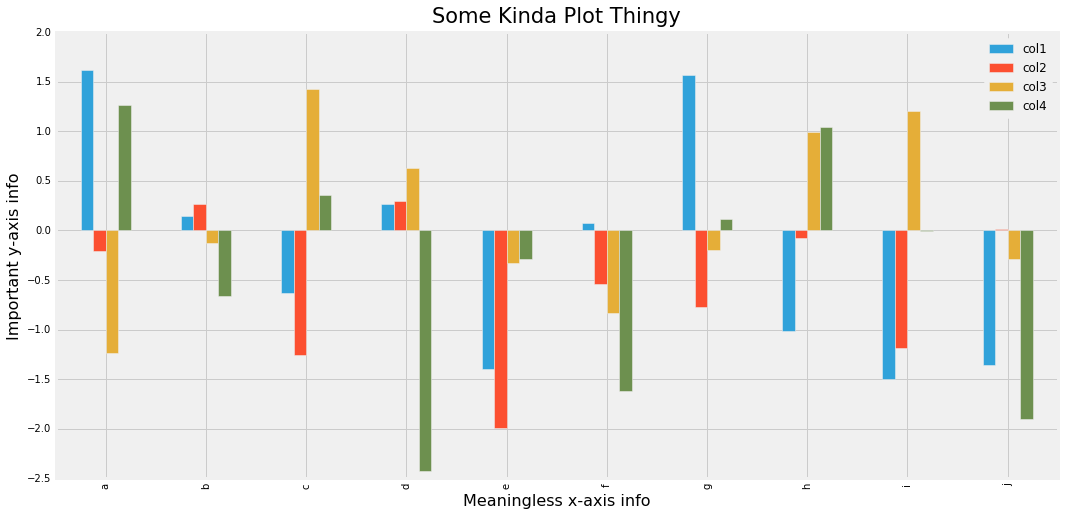

In [95]:
fig = df.plot(kind='bar', figsize=(16,8))
ax = plt.gca()

# set the title
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01)

# move the legend
ax.legend(loc=1)

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16)

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

## We can switch to horizontal bars...

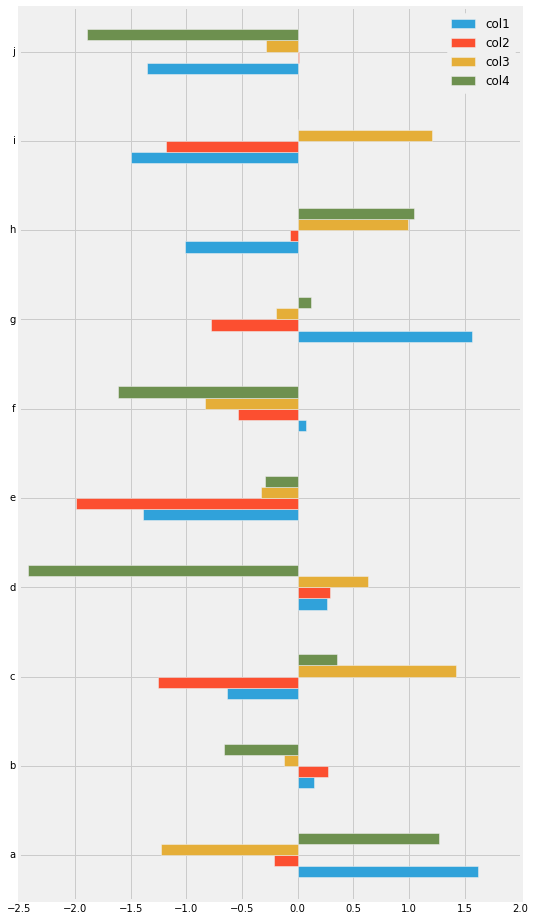

In [96]:
df.plot(kind='barh', figsize=(8,16))

## E4. Create a bar chart using col1 and col2. Give it a large title of your choosing. Move the legend to the lower-left corner.

## E5. Do the same thing but with horizontal bars. Move the legend to the upper-right.

## We can use stacked bars

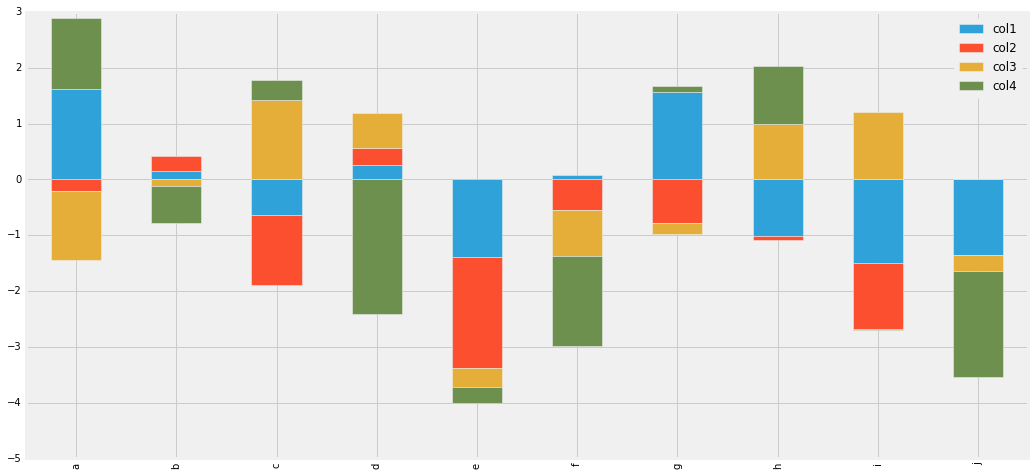

In [97]:
df.plot(kind='bar', stacked=True, figsize=(16,8))

## <ul> Must use on multiple columns

## Stacked works on hbar too

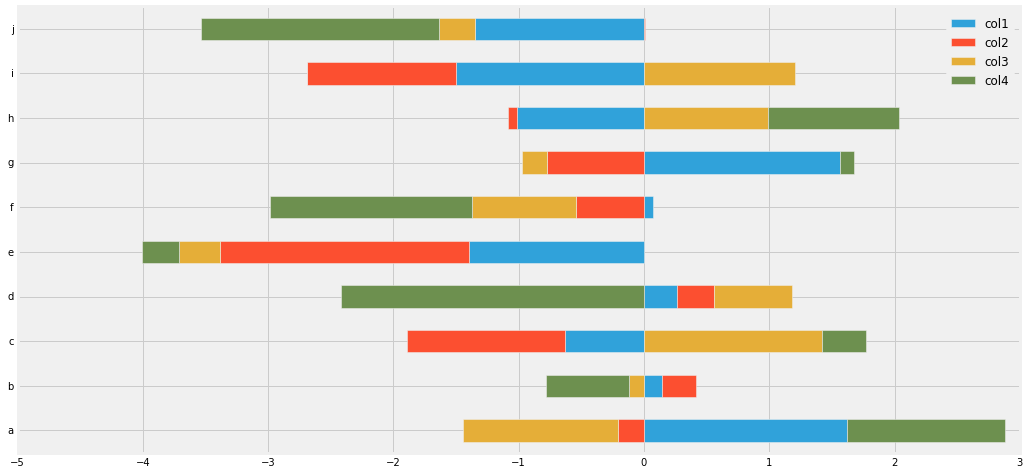

In [98]:
df.plot(kind='barh', stacked=True, figsize=(16,8))

## E6. Create a stacked bar chart using any two columns. Either vertical or horizontal.

# Scatter Plots

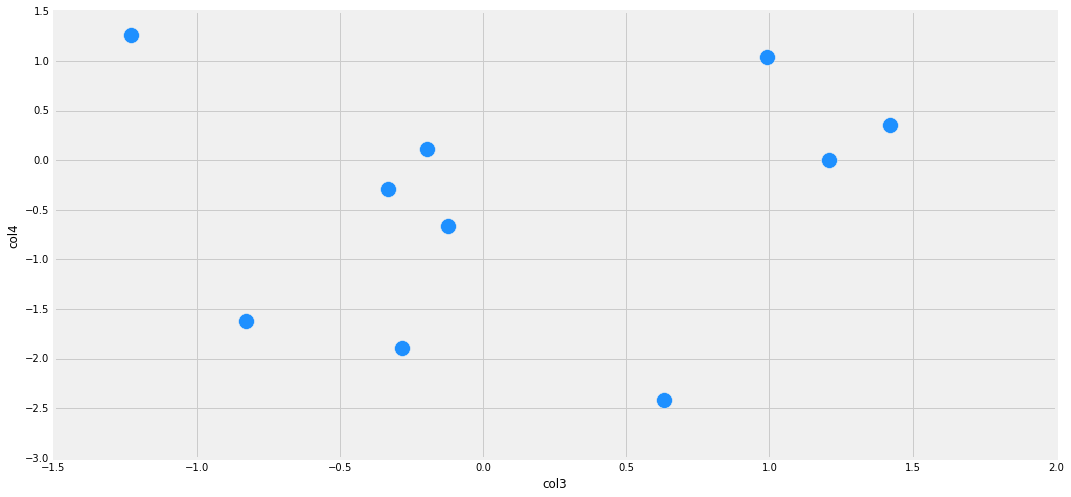

In [310]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue', figsize=(16,8), s=250)

## E7. Create a scatter plot using the DataFrame below. Adjust the size of each point so that it is the value of the y variable to the 4th power. \*_hint_ think list comprehension.

In [329]:
sp_dict = {'x': [1,2,3,4,5], 'y': [2,5,3,9,12]}
sp = pd.DataFrame(sp_dict)
sp

,x,y
0,1,2
1,2,5
2,3,3
3,4,9
4,5,12


# Histograms

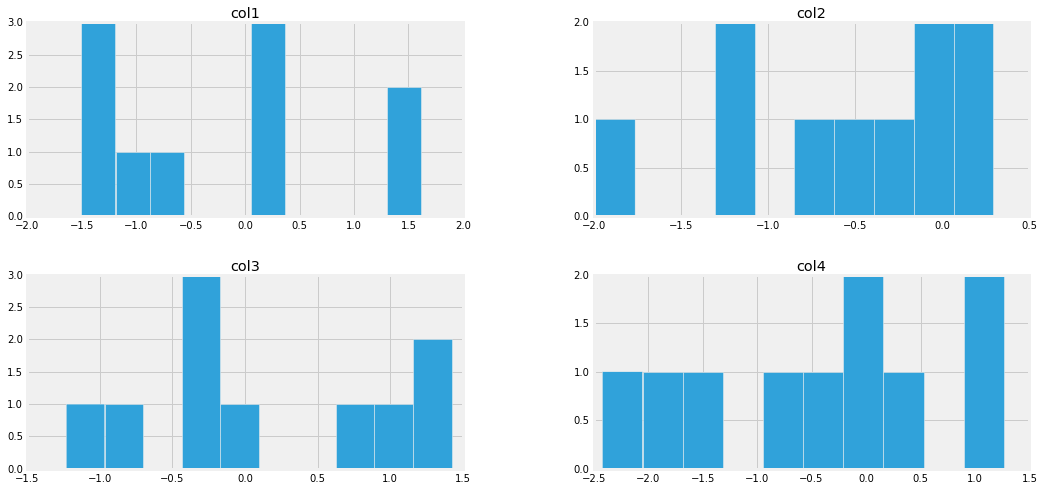

In [175]:
df.hist(figsize=(16,8));

## Single historgram

In [184]:
norm = np.random.standard_normal(5000)

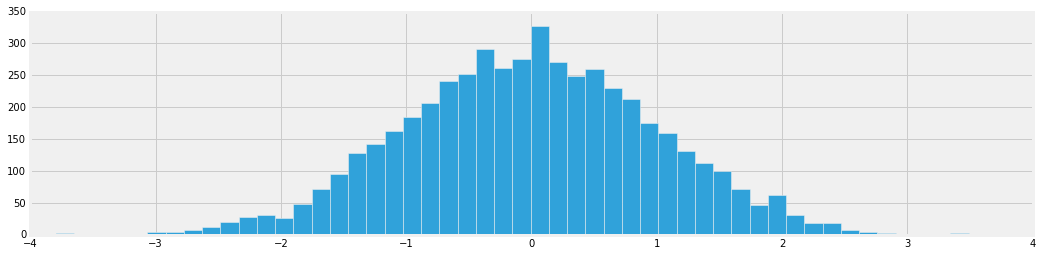

In [186]:
pd.Series(norm).hist(figsize=(16,4), bins=50)

## Bins param adjusts the no. of bins

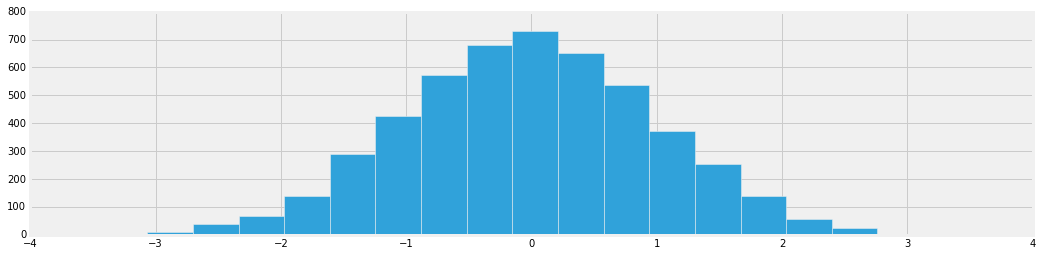

In [450]:
pd.Series(norm).hist(figsize=(16,4), bins=20)

## E8. Create a histogram of the poisson distribution using the parameters 5 and 1 million. Set the bins to 20.

## Understanding figures, subplots, and axes

<em style="font-size:26px">In matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container which contains all the objects representing axes, graphics, text, labels, etc. 

The axes (an instance of the class plt.Axes) is what we see below: a bounding box with ticks and labels, which will eventually contain other plot elements.</em>


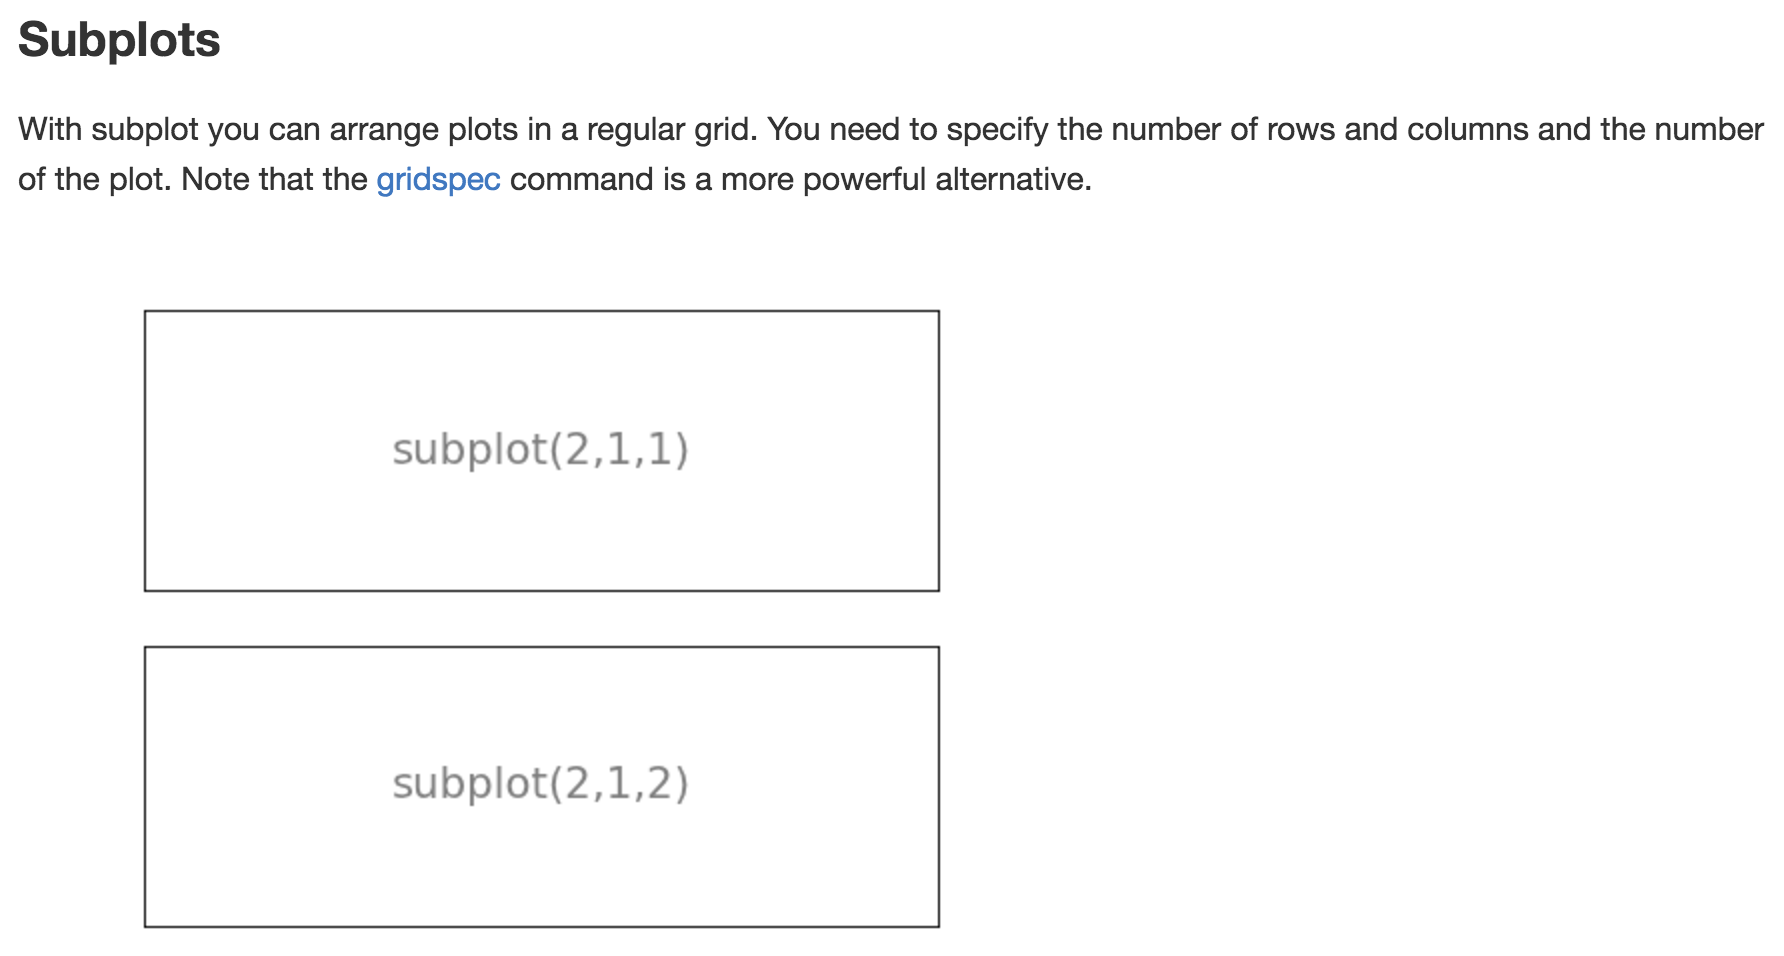

In [231]:
Image(PATH + 'subplots.png')

#### <ul> A 2 by 1 subplot arrangement

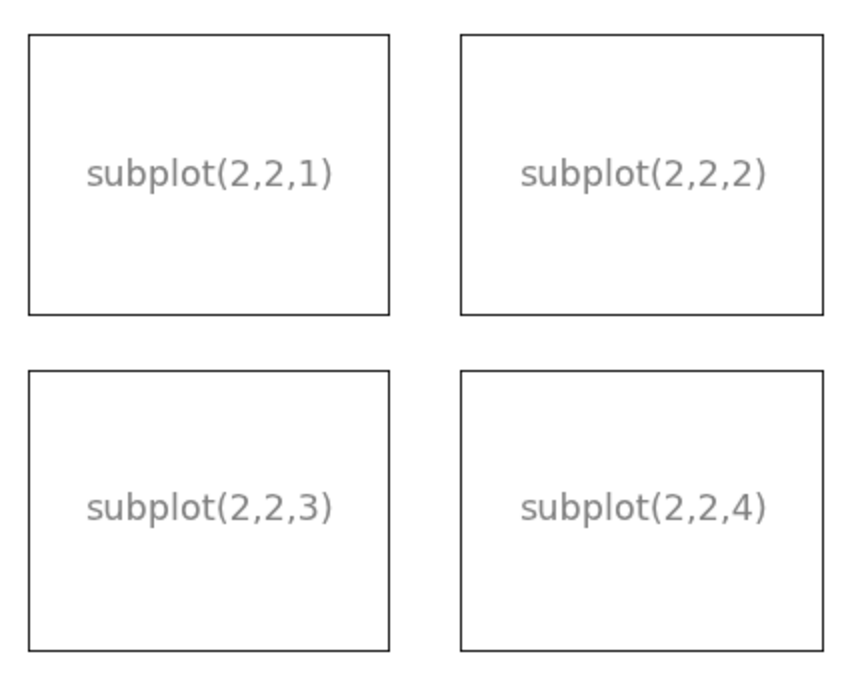

In [232]:
Image(PATH + 'subplots2.png')

#### A 2 by 2 arrangement

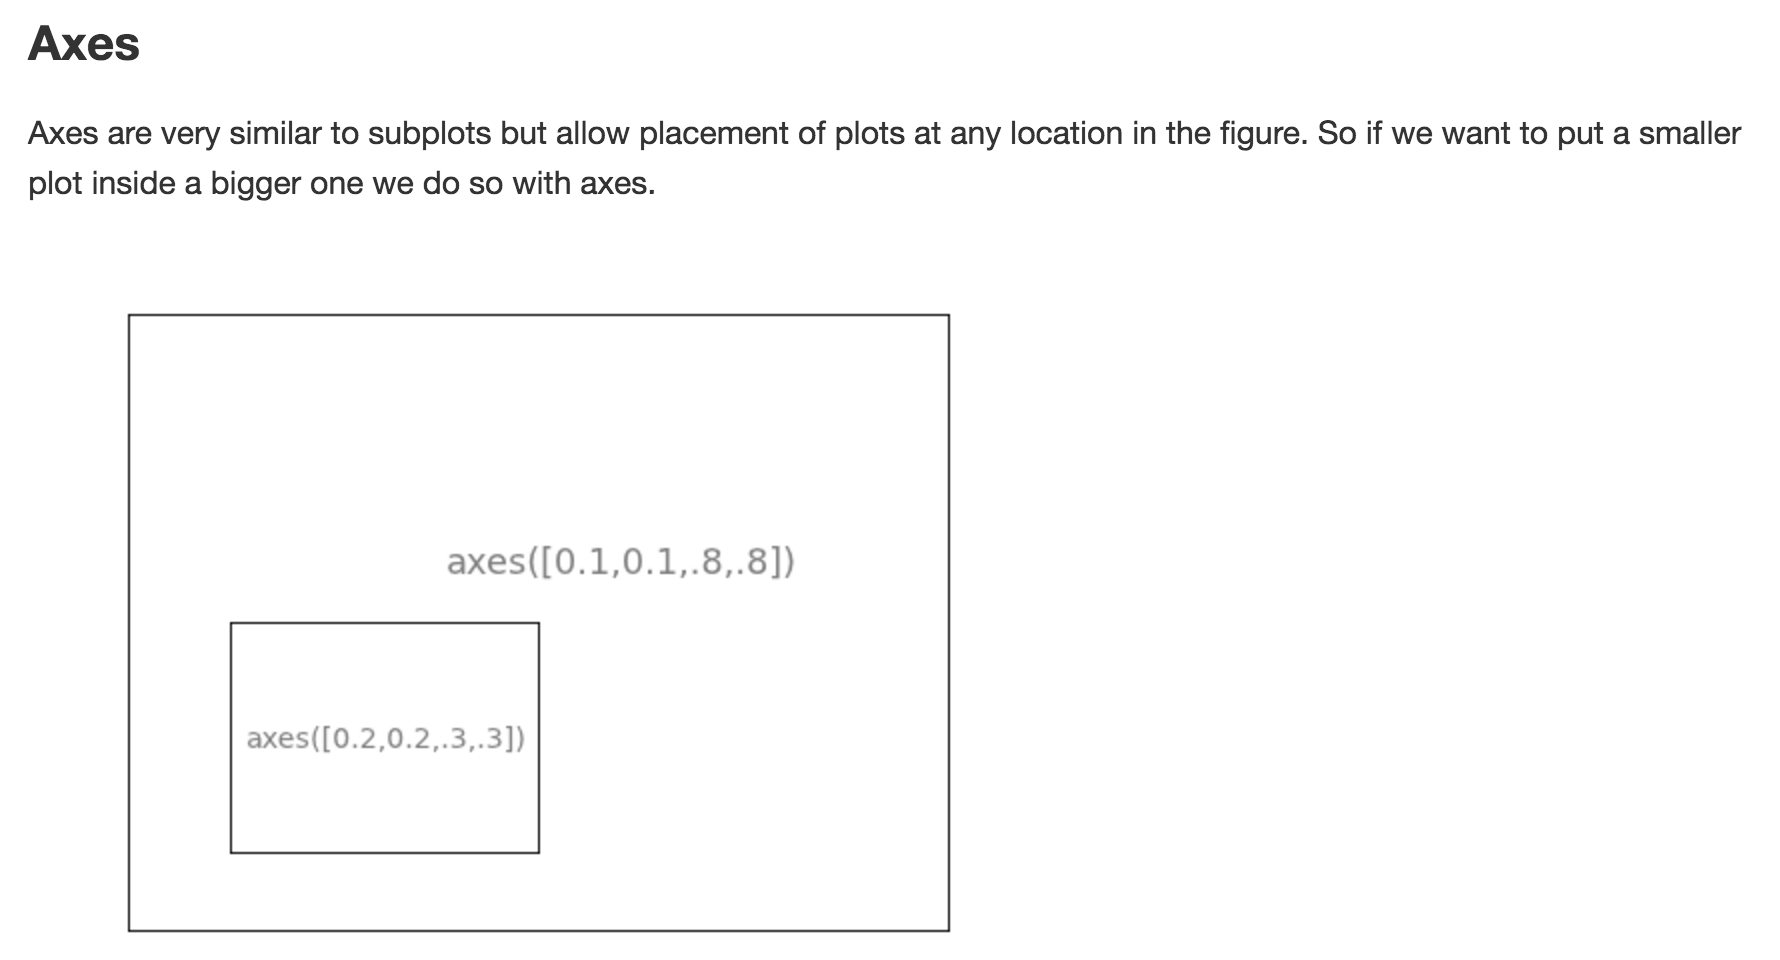

In [234]:
Image(PATH + 'axes.png')

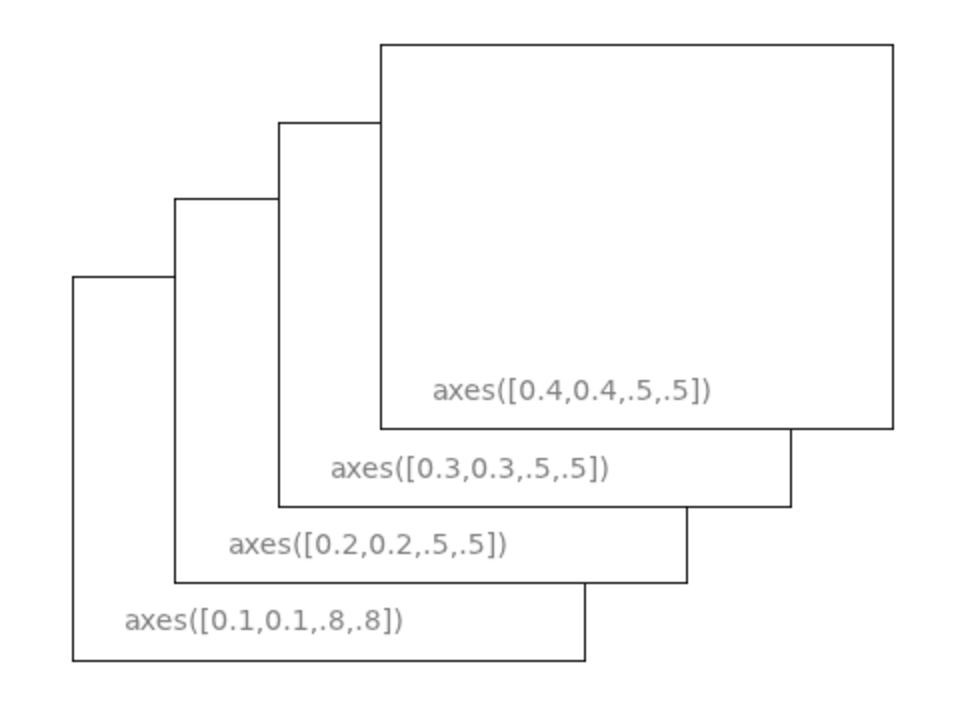

In [236]:
Image(PATH + 'axes2.png')

## Create an example

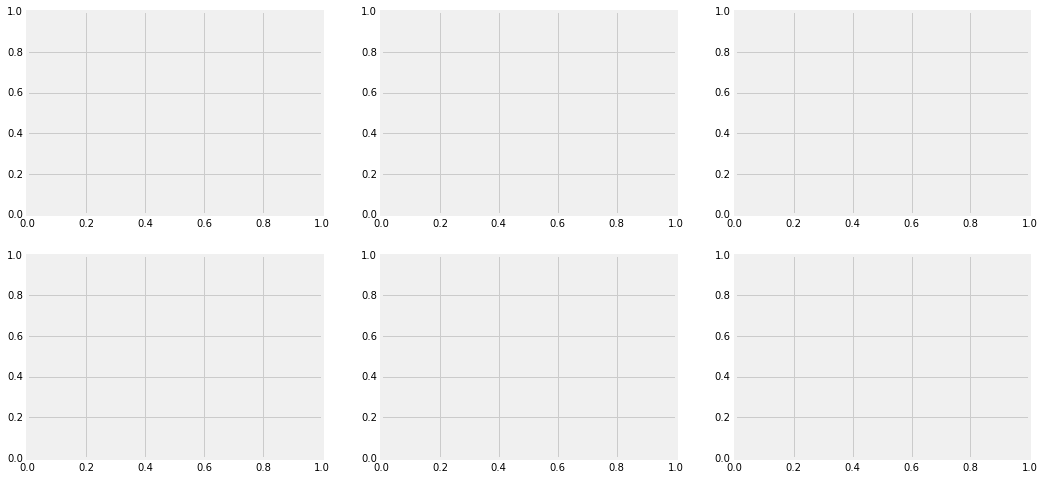

In [452]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

axes_details = type(axes)
fig_details = type(fig)

In [239]:
fig_details

matplotlib.figure.Figure

In [240]:
axes_details

numpy.ndarray

In [241]:
axes.shape

(2, 3)

In [228]:
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x141f217d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14171f5d0>], dtype=object)

In [247]:
axes[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1477d1a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1464c3a10>], dtype=object)

In [248]:
axes[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

## Changing ticks on a subplot

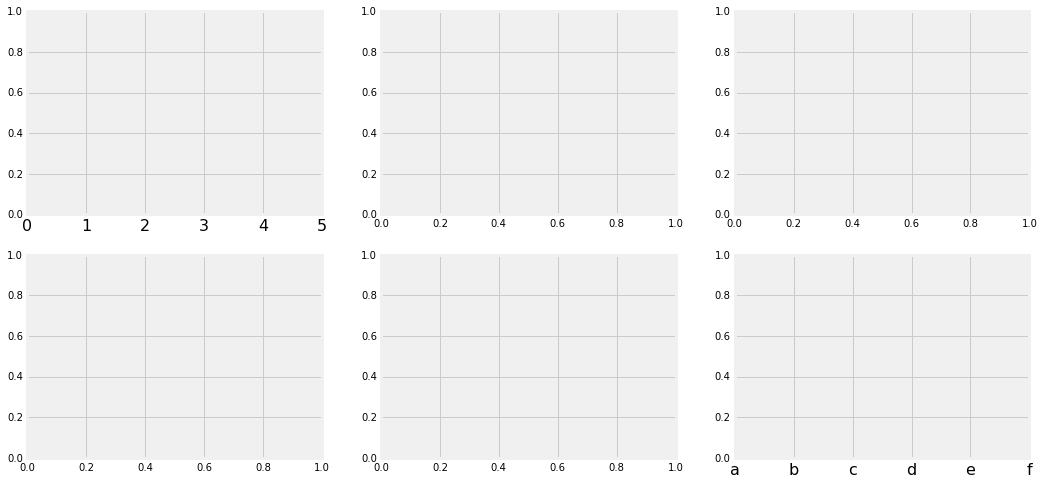

In [252]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

# change upper-left plot x ticks
axes[0][0].set_xticklabels([0,1,2,3,4,5], fontsize=16)

# change lower-right plot x ticks
axes[1][2].set_xticklabels(['a','b','c','d','e','f'], fontsize=16)

## Setting titles

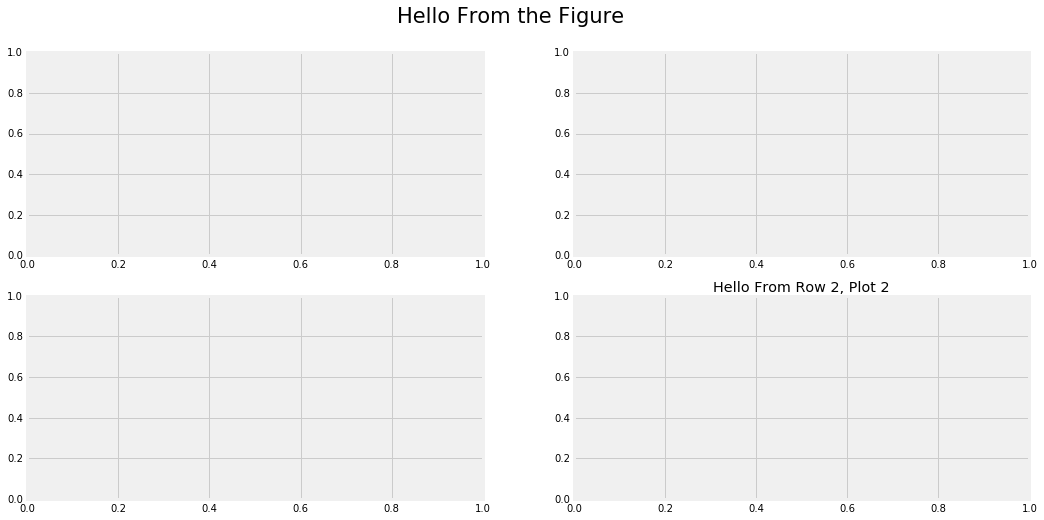

In [263]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# set title for bottom-right plot
axes[1][1].set_title('Hello From Row 2, Plot 2')

fig.suptitle('Hello From the Figure', fontsize=21)

## Independent Exercise

- Create a plot that is 1 across and three long
- Create a line 10 elements long with a postive slope in the first plot 
- Color it green
- Give it a title
- In the second plot, create a line (10 elements) with a negative slope
- Give it a title
- Color it red
- In the last plot, plot both a line with an increasing slope and a decreasing slope
- Give that a title as well
- Finally, give the entire plot a main title
- Now using those same negative and positive values, create a DataFrame from them
- Using that DataFrame, create two scatterplots using pandas plotting one with a positive slope and one with a negative slope. Make sure to adjust the marker size so that the dots are large enough to view easily.
- Now using subplots with matplotlib, draw both scatterplots on a single subplot
- Using .set_xlim() change the scatter plot so that it starts at zero

## Create a plot that is 1 across and 3 long

## Plot a line with an increasing slope in the top subplot

## Add a line with a negative slope

## Add both to the last subplot

## Add a title above all the plots

## Create two scatter plots with those lines using pandas

In [408]:
lines = pd.DataFrame({'pos': pos_slope, 'neg': neg_slope})
lines

,neg,pos
0,9,0
1,8,1
2,7,2
3,6,3
4,5,4
5,4,5
6,3,6
7,2,7
8,1,8
9,0,9


## x is negative and y is positive

## x is positive and y is negative

## Create two scatter plots on the same subplot

## Set the xlim